In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [271]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2018.xlsx")

In [272]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,26920,2018,4301,Aaron Harrison,NaN,SG,23,3,NBA,DAL,9,3,233,19,69,0.275,9,43,0.209,10,26,0.385,0.341,13,17,0.765,4,20,24,11,9,2,3,27,60
1,26928,2018,3982,Alec Burks,NaN,SG,26,7,NBA,UTA,64,1,1059,170,414,0.411,47,142,0.331,123,272,0.452,0.467,107,124,0.863,19,173,192,67,37,8,60,75,494
2,26935,2018,4143,Allen Crabbe,NaN,SG,25,5,NBA,BRK,75,68,2197,337,827,0.407,201,532,0.378,136,295,0.461,0.529,115,135,0.852,28,296,324,117,47,35,78,168,990
3,26939,2018,4467,Andre Ingram,NaN,SG,32,1,NBA,LAL,2,0,64,8,17,0.471,5,9,0.556,3,8,0.375,0.618,3,3,1.000,1,5,6,7,3,3,3,3,24
4,26940,2018,4144,Andre Roberson,NaN,SG,26,5,NBA,OKC,39,39,1037,87,162,0.537,8,36,0.222,79,126,0.627,0.562,12,38,0.316,75,110,185,46,45,35,30,89,194


In [273]:
pd.set_option('display.max_columns', None)

In [274]:
print(data)

     seas_id  season  player_id               player  birth_year pos  age  \
0      26920    2018       4301       Aaron Harrison         NaN  SG   23   
1      26928    2018       3982           Alec Burks         NaN  SG   26   
2      26935    2018       4143         Allen Crabbe         NaN  SG   25   
3      26939    2018       4467         Andre Ingram         NaN  SG   32   
4      26940    2018       4144       Andre Roberson         NaN  SG   26   
..       ...     ...        ...                  ...         ...  ..  ...   
151    27574    2018       4579  Xavier Rathan-Mayes         NaN  SG   23   
152    27575    2018       4062         Xavier Silas         NaN  SG   30   
153    27576    2018       4461         Yogi Ferrell         NaN  SG   24   
154    27578    2018       4299          Zach LaVine         NaN  SG   22   
155    26930    2018       4375        Ãlex Abrines         NaN  SG   24   

     experience   lg   tm   g  gs    mp   fg  fga  fg_percent  x3p  x3pa  \

In [275]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0     60    9    9    4   11   24    2   3         0.341       0.275   
1    494   47   37   19   67  192    8   1         0.467       0.411   
2    990  201   47   28  117  324   35  68         0.529       0.407   
3     24    5    3    1    7    6    3   0         0.618       0.471   
4    194    8   45   75   46  185   35  39         0.562       0.537   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
151   29    1    6    0   18    5    3   0         0.298       0.286   
152    0    0    1    1    0    2    0   0         0.000       0.000   
153  838  134   64   26  201  249    9  21         0.518       0.426   
154  401   42   24    9   72   94    4  24         0.442       0.383   
155  353   84   38   26   28  114    8   8         0.540       0.395   

     x3p_percent  
0          0.209  
1          0.331  
2          0.378  
3          0.556  
4          0.222  
..           ...  
15

In [276]:

filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)


C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

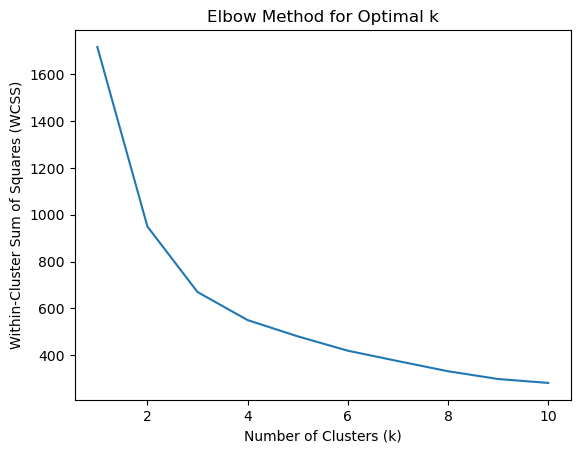

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [278]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0     60    9    9    4   11   24    2   3         0.341       0.275   
1    494   47   37   19   67  192    8   1         0.467       0.411   
2    990  201   47   28  117  324   35  68         0.529       0.407   
3     24    5    3    1    7    6    3   0         0.618       0.471   
4    194    8   45   75   46  185   35  39         0.562       0.537   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
151   29    1    6    0   18    5    3   0         0.298       0.286   
152    0    0    1    1    0    2    0   0         0.000       0.000   
153  838  134   64   26  201  249    9  21         0.518       0.426   
154  401   42   24    9   72   94    4  24         0.442       0.383   
155  353   84   38   26   28  114    8   8         0.540       0.395   

     x3p_percent  Cluster  
0          0.209        3  
1          0.331        1  
2          0.378        0  
3          0.556       

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


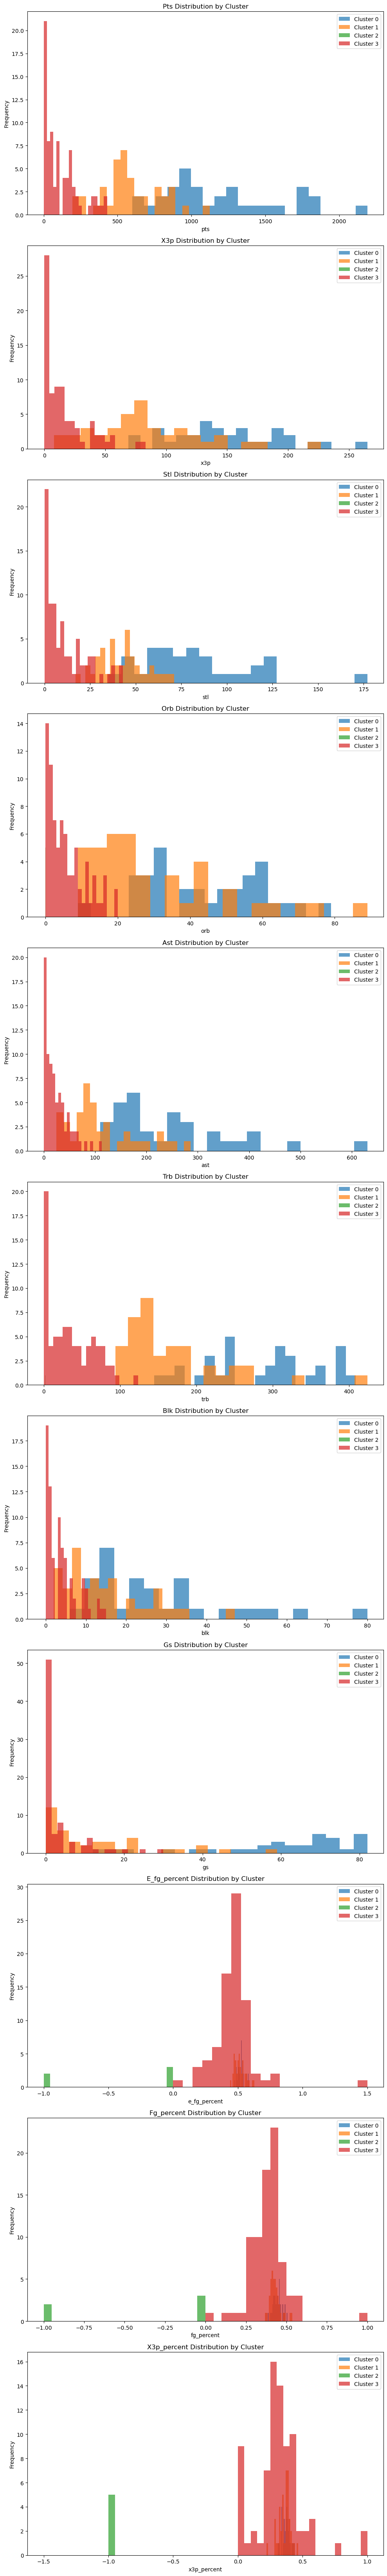

In [279]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
